In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1000)

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
   tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
mnist_digits = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_digits.load_data()

In [4]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=96, input_shape=(28,28,1), kernel_size=(1,1), strides=(1,1), padding='valid', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(1,1), strides=(1,1), padding='valid'),
    keras.layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
train_images = np.expand_dims(train_images, axis=3)

In [7]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 35s 575us/sample - loss: 0.4547 - accuracy: 0.9445
Epoch 2/5
60000/60000 [==============================] - 33s 552us/sample - loss: 0.0699 - accuracy: 0.9795
Epoch 3/5
60000/60000 [==============================] - 32s 534us/sample - loss: 0.0513 - accuracy: 0.9853
Epoch 4/5
60000/60000 [==============================] - 32s 535us/sample - loss: 0.0362 - accuracy: 0.9904
Epoch 5/5
60000/60000 [==============================] - 34s 561us/sample - loss: 0.0289 - accuracy: 0.9919


In [8]:
test_images = np.expand_dims(test_images, axis=3)

In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 2s - loss: 0.0380 - accuracy: 0.9898


In [10]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


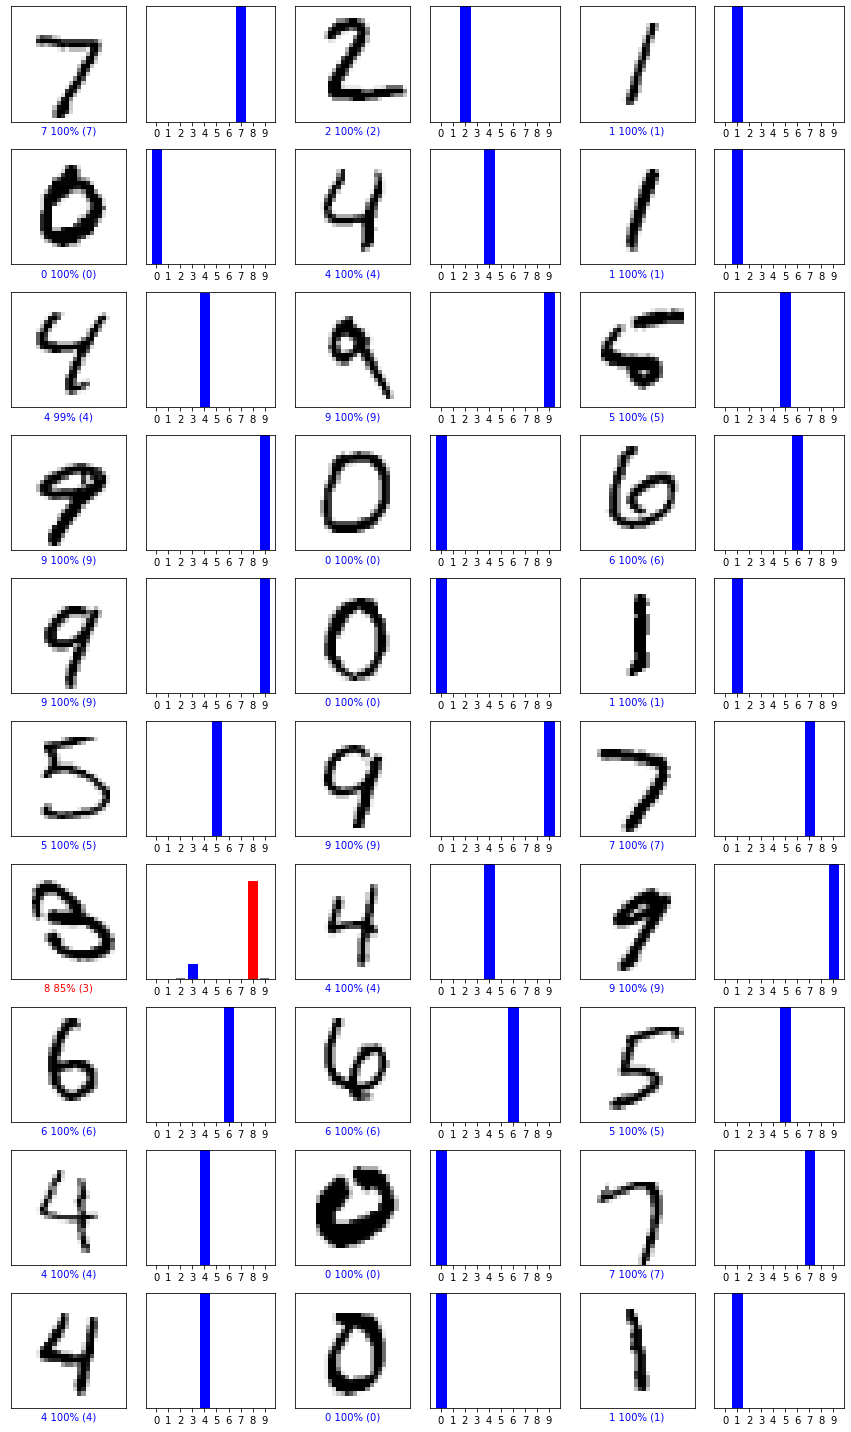

In [11]:
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
predictions = model.predict(test_images)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()